In [2]:
import mlrose_hiive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from ucimlrepo import fetch_ucirepo 
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from mlrose_hiive import NNGSRunner

from multiprocessing import Pool

# fetch dataset 
statlog_vehicle_silhouettes = fetch_ucirepo(id=149) 
  
# data (as pandas dataframes) 
X_df = statlog_vehicle_silhouettes.data.features 
y_df = statlog_vehicle_silhouettes.data.targets 
  
# metadata 
#print(statlog_vehicle_silhouettes.metadata) 
  
# variable information 
#print(statlog_vehicle_silhouettes.variables) 

print(X_df)
print(y_df)

print('Classes')
print(y_df.groupby(['class'])['class'].count())

label_encoder = LabelEncoder()
y_df['class'] = label_encoder.fit_transform(y_df['class'])
y_df.info()

print('Classes')
print(y_df.groupby(['class'])['class'].count())

data_df = pd.concat([X_df, y_df], axis=1)

nans = data_df.isna()
print('Missing values')
print(nans.sum(axis=0))

data_df.dropna(inplace=True)
data_df = data_df[data_df['class'] != 0]

data_df.reset_index(drop=True,inplace=True)

print(data_df.groupby(['class'])['class'].count())

data_df['class'].values[data_df['class'].values != 2] = 0
data_df['class'].values[data_df['class'].values == 2] = 1

print(data_df.groupby(['class'])['class'].count())

# Feature df
X_df = data_df.copy()
X_df.drop(['class'], axis=1, inplace=True)

X = X_df.values
y = data_df['class'].values

seed = 903946366

# Shuffle data and then split into the training and the test set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = seed, 
                                                    stratify = y)

# Standardize data
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test)

# Shuffle training data and then split into training and validation set 
X_train, X_vld, y_train, y_vld = train_test_split(X_train_full, y_train_full, test_size = 0.2, shuffle = True, random_state = 1988, 
                                                    stratify = y_train_full)

     COMPACTNESS  CIRCULARITY  DISTANCE CIRCULARITY  RADIUS RATIO  \
0           95.0           48                    83           178   
1           91.0           41                    84           141   
2          104.0           50                   106           209   
3           93.0           41                    82           159   
4           85.0           44                    70           205   
..           ...          ...                   ...           ...   
841         93.0           39                    87           183   
842         89.0           46                    84           163   
843        106.0           54                   101           222   
844         86.0           36                    78           146   
845         85.0           36                    66           123   

     PR.AXIS ASPECT RATIO  MAX.LENGTH ASPECT RATIO  SCATTER RATIO  \
0                      72                       10            162   
1                      57        

In [2]:
from multiprocessing import Pool
import workers_sa

seed_list = [1, 2, 3, 4, 5]
learning_rate_list = [0.1]
init_temp_list = [0.001]
exp_const = 0.005
max_iters = 100000
early_stopping = True
max_attempts = 400

parameters = []

output_file = 'sa_clbr_lr0.1_temp1'

for init_temp in init_temp_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((init_temp, exp_const, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness',
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_sa.sa_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
sa_clbr_lr01_temp1 = fitcrv

Done!


In [3]:
seed_list = [1, 2, 3, 4, 5]
learning_rate_list = [0.1]
init_temp_list = [0.01]
exp_const = 0.005
max_iters = 100000
early_stopping = True
max_attempts = 400

parameters = []

output_file = 'sa_clbr_lr0.1_temp2'

for init_temp in init_temp_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((init_temp, exp_const, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness',
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_sa.sa_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
sa_clbr_lr01_temp2 = fitcrv

Done!


In [4]:
seed_list = [1, 2, 3, 4, 5]
learning_rate_list = [0.1]
init_temp_list = [0.1]
exp_const = 0.005
max_iters = 100000
early_stopping = True
max_attempts = 400

parameters = []

output_file = 'sa_clbr_lr0.1_temp3'

for init_temp in init_temp_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((init_temp, exp_const, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness',
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_sa.sa_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
sa_clbr_lr01_temp3 = fitcrv

Done!


In [5]:
seed_list = [1, 2, 3, 4, 5]
learning_rate_list = [0.1]
init_temp_list = [1.0]
exp_const = 0.005
max_iters = 100000
early_stopping = True
max_attempts = 400

parameters = []

output_file = 'sa_clbr_lr0.1_temp4'

for init_temp in init_temp_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((init_temp, exp_const, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness',
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_sa.sa_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
sa_clbr_lr01_temp4 = fitcrv

Done!


In [8]:
seed_list = [1, 2, 3, 4, 5]
learning_rate_list = [0.1]
init_temp_list = [10.0]
exp_const = 0.005
max_iters = 100000
early_stopping = True
max_attempts = 400

parameters = []

output_file = 'sa_clbr_lr0.1_temp5'

for init_temp in init_temp_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((init_temp, exp_const, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness',
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_sa.sa_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
sa_clbr_lr01_temp5 = fitcrv

Done!


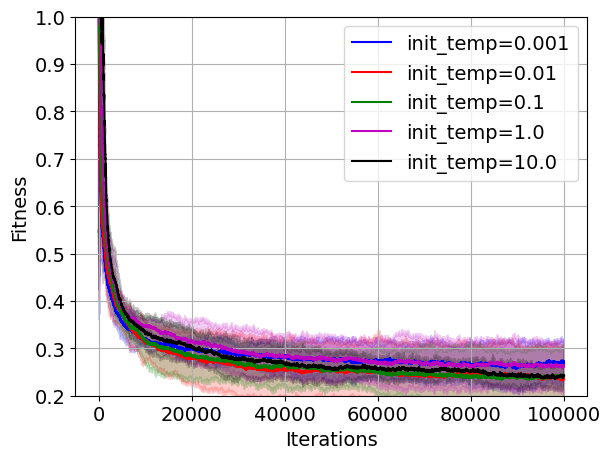

In [24]:
fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(range(sa_clbr_lr01_temp1.shape[0]), sa_clbr_lr01_temp1['mean'], label='init_temp=0.001', color='b')
ax.fill_between(range(sa_clbr_lr01_temp1.shape[0]), sa_clbr_lr01_temp1['mean'] - 2*sa_clbr_lr01_temp1['std'], 
                sa_clbr_lr01_temp1['mean'] + 2*sa_clbr_lr01_temp1['std'], alpha=0.2, color="b")

ax.plot(range(sa_clbr_lr01_temp2.shape[0]), sa_clbr_lr01_temp2['mean'], label='init_temp=0.01', color='r')
ax.fill_between(range(sa_clbr_lr01_temp2.shape[0]), sa_clbr_lr01_temp2['mean'] - 2*sa_clbr_lr01_temp2['std'], 
                sa_clbr_lr01_temp2['mean'] + 2*sa_clbr_lr01_temp2['std'], alpha=0.2, color="r")

ax.plot(range(sa_clbr_lr01_temp3.shape[0]), sa_clbr_lr01_temp3['mean'], label='init_temp=0.1', color='g')
ax.fill_between(range(sa_clbr_lr01_temp3.shape[0]), sa_clbr_lr01_temp3['mean'] - 2*sa_clbr_lr01_temp3['std'], 
                sa_clbr_lr01_temp3['mean'] + 2*sa_clbr_lr01_temp3['std'], alpha=0.2, color="g")

ax.plot(range(sa_clbr_lr01_temp4.shape[0]), sa_clbr_lr01_temp4['mean'], label='init_temp=1.0', color='m')
ax.fill_between(range(sa_clbr_lr01_temp4.shape[0]), sa_clbr_lr01_temp4['mean'] - 2*sa_clbr_lr01_temp4['std'], 
                sa_clbr_lr01_temp4['mean'] + 2*sa_clbr_lr01_temp4['std'], alpha=0.2, color="m")

ax.plot(range(sa_clbr_lr01_temp5.shape[0]), sa_clbr_lr01_temp5['mean'], label='init_temp=10.0', color='k')
ax.fill_between(range(sa_clbr_lr01_temp5.shape[0]), sa_clbr_lr01_temp5['mean'] - 2*sa_clbr_lr01_temp5['std'], 
                sa_clbr_lr01_temp5['mean'] + 2*sa_clbr_lr01_temp5['std'], alpha=0.2, color="k")

ax.tick_params(labelsize=fontsize)

#ax.plot(range(len(fitness_curve_rhc6)), fitness_curve_rhc6.mean(axis=1),'b', label='Training max_attempts=100\nlearning_rate=0.001')
#ax.tick_params(labelsize=fontsize)

ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_xlim(0, 8000)
ax.set_ylim(0.2, 1)
ax.legend(fontsize=fontsize)
# Turn on the grid
plt.grid(True)
plt.show()
plt.close(fig)

In [44]:
seed_list = [1, 2, 3, 4, 5]
learning_rate_list = [0.005]
init_temp_list = [1.0]
exp_const = 0.005
max_iters = 400000
early_stopping = True
max_attempts = 400

parameters = []

output_file = 'sa_clbr_lr0005_temp'

for init_temp in init_temp_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((init_temp, exp_const, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness',
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_sa.sa_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
sa_clbr_lr0005_temp = fitcrv

#######################################################
seed_list = [1, 2, 3, 4, 5]
learning_rate_list = [0.01]
init_temp_list = [1.0]
exp_const = 0.005
max_iters = 400000
early_stopping = True
max_attempts = 400

parameters = []

output_file = 'sa_clbr_lr001_temp'

for init_temp in init_temp_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((init_temp, exp_const, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness',
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_sa.sa_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
sa_clbr_lr001_temp = fitcrv

#######################################################
seed_list = [1, 2, 3, 4, 5]
learning_rate_list = [0.1]
init_temp_list = [1.0]
exp_const = 0.005
max_iters = 400000
early_stopping = True
max_attempts = 400

parameters = []

output_file = 'sa_clbr_lr01_temp'

for init_temp in init_temp_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((init_temp, exp_const, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness',
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_sa.sa_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
sa_clbr_lr01_temp = fitcrv


Done!
Done!


In [46]:
######################################################
seed_list = [1, 2, 3, 4, 5]
learning_rate_list = [1.0]
init_temp_list = [1.0]
exp_const = 0.005
max_iters = 400000
early_stopping = True
max_attempts = 400

parameters = []

output_file = 'sa_clbr_lr1_temp'

for init_temp in init_temp_list:
    for learning_rate in learning_rate_list:
        for seed in seed_list:
            
            parameters.append((init_temp, exp_const, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness',
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_sa.sa_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
sa_clbr_lr1_temp = fitcrv

Done!


In [15]:
#sa_clbr_lr1_temp.to_csv('sa_clbr_lr1_temp.csv', index=False) 
#sa_clbr_lr01_temp.to_csv('sa_clbr_lr01_temp.csv', index=False) 
#sa_clbr_lr001_temp.to_csv('sa_clbr_lr001_temp.csv', index=False) 
#sa_clbr_lr0005_temp.to_csv('sa_clbr_lr0005_temp.csv', index=False) 

sa_clbr_lr1_temp   = pd.read_csv('sa_clbr_lr1_temp.csv') 
sa_clbr_lr01_temp  = pd.read_csv('sa_clbr_lr01_temp.csv') 
sa_clbr_lr001_temp = pd.read_csv('sa_clbr_lr001_temp.csv') 
sa_clbr_lr0005_temp= pd.read_csv('sa_clbr_lr0005_temp.csv') 

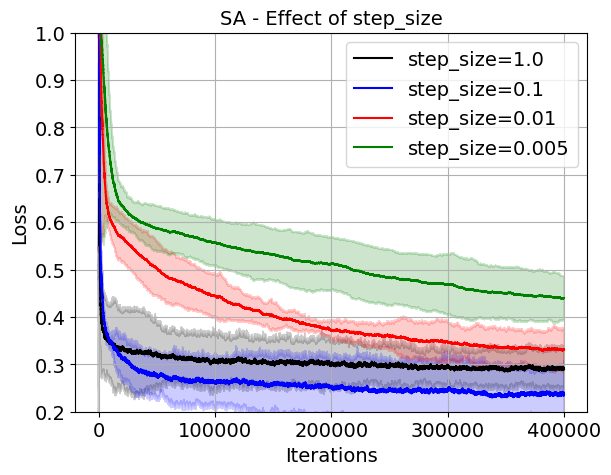

In [16]:
fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(range(sa_clbr_lr1_temp.shape[0]), sa_clbr_lr1_temp['mean'], label='step_size=1.0', color='k')
ax.fill_between(range(sa_clbr_lr1_temp.shape[0]), sa_clbr_lr1_temp['mean'] - 2*sa_clbr_lr1_temp['std'], 
                sa_clbr_lr1_temp['mean'] + 2*sa_clbr_lr1_temp['std'], alpha=0.2, color="k")

ax.plot(range(sa_clbr_lr01_temp.shape[0]), sa_clbr_lr01_temp['mean'], label='step_size=0.1', color='b')
ax.fill_between(range(sa_clbr_lr01_temp.shape[0]), sa_clbr_lr01_temp['mean'] - 2*sa_clbr_lr01_temp['std'], 
                sa_clbr_lr01_temp['mean'] + 2*sa_clbr_lr01_temp['std'], alpha=0.2, color="b")

ax.plot(range(sa_clbr_lr001_temp.shape[0]), sa_clbr_lr001_temp['mean'], label='step_size=0.01', color='r')
ax.fill_between(range(sa_clbr_lr001_temp.shape[0]), sa_clbr_lr001_temp['mean'] - 2*sa_clbr_lr001_temp['std'], 
                sa_clbr_lr001_temp['mean'] + 2*sa_clbr_lr001_temp['std'], alpha=0.2, color="r")

ax.plot(range(sa_clbr_lr0005_temp.shape[0]), sa_clbr_lr0005_temp['mean'], label='step_size=0.005', color='g')
ax.fill_between(range(sa_clbr_lr0005_temp.shape[0]), sa_clbr_lr0005_temp['mean'] - 2*sa_clbr_lr0005_temp['std'], 
                sa_clbr_lr0005_temp['mean'] + 2*sa_clbr_lr0005_temp['std'], alpha=0.2, color="g")

ax.tick_params(labelsize=fontsize)

#ax.plot(range(len(fitness_curve_rhc6)), fitness_curve_rhc6.mean(axis=1),'b', label='Training max_attempts=100\nlearning_rate=0.001')
#ax.tick_params(labelsize=fontsize)
ax.set_title('SA - Effect of step_size', fontsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_xlim(0, 8000)
ax.set_ylim(0.2, 1)
ax.legend(fontsize=fontsize)
# Turn on the grid
plt.grid(True)
plt.show()
fig.savefig('sa_effect_step_size.png')
plt.close(fig)

## train time
#fontsize = 14
#fig = plt.figure()
#ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
#
#ax.plot(restart_list, time_mean_01, '-o', label='step_size = 0.1', color='b')
#ax.fill_between(restart_list, time_mean_01 - 2*time_std_01, time_mean_01 + 2*time_std_01, alpha=0.2, color="b")
#
#ax.plot(restart_list, time_mean_001, '-o', label='step_size = 0.01', color='r')
#ax.fill_between(restart_list, time_mean_001 - 2*time_std_001, time_mean_001 + 2*time_std_001, alpha=0.2, color="r")
#
#ax.plot(restart_list, time_mean_0005, '-o', label='step_size = 0.005', color='g')
#ax.fill_between(restart_list, time_mean_0005 - 2*time_std_0005, time_mean_0005 + 2*time_std_0005, alpha=0.2, color="g")
#
#ax.tick_params(labelsize=fontsize)
#ax.set_xlabel('Number of Restarts', fontsize=fontsize) 
#ax.set_ylabel('Train time (s)', fontsize=fontsize)
##ax.set_xlim(0, 8000)
##ax.set_ylim(0.2, 1)
#ax.legend(fontsize=fontsize)
## Turn on the grid
#plt.grid(True)
#plt.show()
#plt.close(fig)

In [15]:
seed_list = [1, 2, 3, 4, 5]
learning_rate= 0.1
init_temp_list = [0.001, 0.01, 0.1, 1.0, 10.0]
exp_const_list = [0.0005, 0.005, 0.05]
max_iters = 100000
early_stopping = True
max_attempts = 400

parameters = []

output_file = 'sa_clbr_lr0.1_decay'

for init_temp in init_temp_list:
    for exp_const in exp_const_list:
        for seed in seed_list:
            
            parameters.append((init_temp, exp_const, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness',
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 22)
    output = p.map(workers_sa.sa_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
sa_clbr_lr01_decay = fitcrv

Done!


In [17]:
df_sa_clbr = pd.read_csv('sa_clbr_lr0.1_decay_results.txt', sep=' ')
df_sa_clbr_mean = df_sa_clbr.groupby(['init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts']).mean()
df_sa_clbr_std  = df_sa_clbr.groupby(['init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts']).std()
df_sa_clbr_mean

seed  \
init_temp exp_const max_iters learning_rate early_stopping max_attempts         
0.001     0.0005    100000    0.1           True           400            3.0   
          0.0050    100000    0.1           True           400            3.0   
          0.0500    100000    0.1           True           400            3.0   
0.010     0.0005    100000    0.1           True           400            3.0   
          0.0050    100000    0.1           True           400            3.0   
          0.0500    100000    0.1           True           400            3.0   
0.100     0.0005    100000    0.1           True           400            3.0   
          0.0050    100000    0.1           True           400            3.0   
          0.0500    100000    0.1           True           400            3.0   
1.000     0.0005    100000    0.1           True           400            3.0   
          0.0050    100000    0.1           True           400            3.0   
          0.0500    100000    0.1           True           400            3.0   
10.000    0.0005    100000    0.1           True           400            3.0   
          0.0050    100000    0.1           True           400            3.0   
          0.0500    100000    0.1           True           400            3.0   

                                                                         auc_train  \
init_temp exp_const max_iters learning_rate early_stopping max_attempts              
0.001     0.0005    100000    0.1           True           400            0.933271   
          0.0050    100000    0.1           True           400            0.933271   
          0.0500    100000    0.1           True           400            0.933271   
0.010     0.0005    100000    0.1           True           400            0.943242   
          0.0050    100000    0.1           True           400            0.947388   
          0.0500    100000    0.1           True           400            0.940326   
0.100     0.0005    100000    0.1           True           400            0.932167   
          0.0050    100000    0.1           True           400            0.948011   
          0.0500    100000    0.1           True           400            0.944006   
1.000     0.0005    100000    0.1           True           400            0.939919   
          0.0050    100000    0.1           True           400            0.933747   
          0.0500    100000    0.1           True           400            0.933436   
10.000    0.0005    100000    0.1           True           400            0.936448   
          0.0050    100000    0.1           True           400            0.947766   
          0.0500    100000    0.1           True           400            0.943761   

                                                                          auc_vld  \
init_temp exp_const max_iters learning_rate early_stopping max_attempts             
0.001     0.0005    100000    0.1           True           400           0.875768   
          0.0050    100000    0.1           True           400           0.875768   
          0.0500    100000    0.1           True           400           0.875768   
0.010     0.0005    100000    0.1           True           400           0.871648   
          0.0050    100000    0.1           True           400           0.871610   
          0.0500    100000    0.1           True           400           0.869551   
0.100     0.0005    100000    0.1           True           400           0.860300   
          0.0050    100000    0.1           True           400           0.891685   
          0.0500    100000    0.1           True           400           0.881236   
1.000     0.0005    100000    0.1           True           400           0.900000   
          0.0050    100000    0.1           True           400           0.873895   
          0.0500    100000    0.1           True           400           0.862996   
10.000    0.0005    100000    0.1         

In [18]:
fitness_mean = df_sa_clbr_mean['fitness'].values
fitness_std = df_sa_clbr_std['fitness'].values

auc_vld_mean = df_sa_clbr_mean['auc_vld'].values
auc_vld_std = df_sa_clbr_std['auc_vld'].values

fitness_mean_005   = np.zeros(len(init_temp_list))
fitness_mean_0005  = np.zeros(len(init_temp_list))
fitness_mean_00005 = np.zeros(len(init_temp_list))

fitness_std_005   = np.zeros(len(init_temp_list))
fitness_std_0005  = np.zeros(len(init_temp_list))
fitness_std_00005 = np.zeros(len(init_temp_list))

auc_vld_mean_005   = np.zeros(len(init_temp_list))
auc_vld_mean_0005  = np.zeros(len(init_temp_list))
auc_vld_mean_00005 = np.zeros(len(init_temp_list))

auc_vld_std_005   = np.zeros(len(init_temp_list))
auc_vld_std_0005  = np.zeros(len(init_temp_list))
auc_vld_std_00005 = np.zeros(len(init_temp_list))

r, s, t = -1, -1, -1
for i in range(0, len(fitness_mean)):
    if (i+1)%3 == 0:
        r += 1
        fitness_mean_005[r]= fitness_mean[i]
        fitness_std_005[r] = fitness_std[i]
        auc_vld_mean_005[r]= auc_vld_mean[i]
        auc_vld_std_005[r] = auc_vld_std[i]
    elif (i+1)%3 == 2:
        s += 1
        fitness_mean_0005[s] = fitness_mean[i]
        fitness_std_0005[s] = fitness_std[i]
        auc_vld_mean_0005[s]= auc_vld_mean[i]
        auc_vld_std_0005[s] = auc_vld_std[i]
    else:
        t += 1
        fitness_mean_00005[t] = fitness_mean[i]
        fitness_std_00005[t] = fitness_std[i]
        auc_vld_mean_00005[t]= auc_vld_mean[i]
        auc_vld_std_00005[t] = auc_vld_std[i]

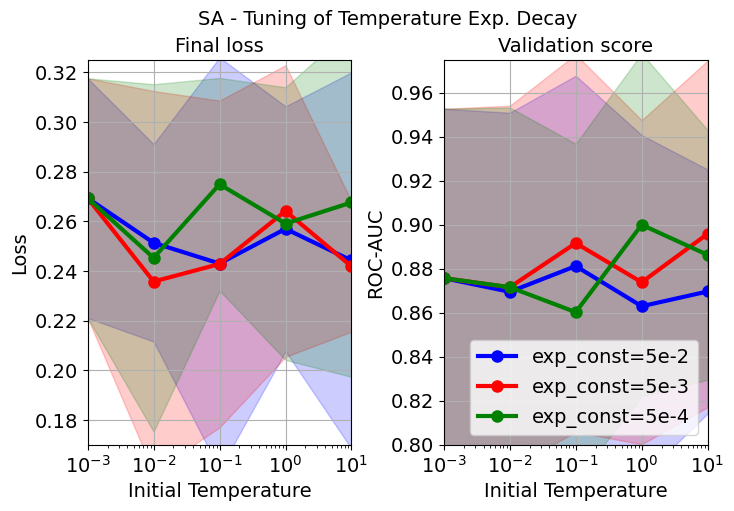

In [68]:
init_temp_list = [0.001, 0.01, 0.1, 1.0, 10.0]

fontsize = 14
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(8, 5))
#ax1 = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax1.plot(init_temp_list, fitness_mean_005, '-o', label='exp_const = 0.05', color='b', linewidth=3, markersize=8)
ax1.fill_between(init_temp_list, fitness_mean_005 - 2*fitness_std_005, fitness_mean_005 + 2*fitness_std_005, alpha=0.2, color="b")

ax1.plot(init_temp_list, fitness_mean_0005, '-o', label='exp_const = 0.005', color='r', linewidth=3, markersize=8)
ax1.fill_between(init_temp_list, fitness_mean_0005 - 2*fitness_std_0005, fitness_mean_0005 + 2*fitness_std_0005, alpha=0.2, color="r")

ax1.plot(init_temp_list, fitness_mean_00005, '-o', label='exp_const = 0.0005', color='g', linewidth=3, markersize=8)
ax1.fill_between(init_temp_list, fitness_mean_00005 - 2*fitness_std_00005, fitness_mean_00005 + 2*fitness_std_00005, alpha=0.2, color="g")

ax1.set_title('Final loss', fontsize=fontsize)
ax1.tick_params(labelsize=fontsize)
ax1.set_xscale("log", base=10)
ax1.set_xlabel('Initial Temperature', fontsize=fontsize) 
ax1.set_ylabel('Loss', fontsize=fontsize)
#ax.set_xlim(0, 8000)
ax1.set_ylim(0.17, 0.325)
ax1.grid(True)
#ax1.legend(fontsize=fontsize)

ax2.plot(init_temp_list, auc_vld_mean_005, '-o', label='exp_const=5e-2', color='b', linewidth=3, markersize=8)
ax2.fill_between(init_temp_list, auc_vld_mean_005 - 2*auc_vld_std_005, auc_vld_mean_005 + 2*auc_vld_std_005, alpha=0.2, color="b")

ax2.plot(init_temp_list, auc_vld_mean_0005, '-o', label='exp_const=5e-3', color='r', linewidth=3, markersize=8)
ax2.fill_between(init_temp_list, auc_vld_mean_0005 - 2*auc_vld_std_0005, auc_vld_mean_0005 + 2*auc_vld_std_0005, alpha=0.2, color="r")

ax2.plot(init_temp_list, auc_vld_mean_00005, '-o', label='exp_const=5e-4', color='g', linewidth=3, markersize=8)
ax2.fill_between(init_temp_list, auc_vld_mean_00005 - 2*auc_vld_std_00005, auc_vld_mean_00005 + 2*auc_vld_std_00005, alpha=0.2, color="g")

ax2.set_title('Validation score', fontsize=fontsize)
ax2.tick_params(labelsize=fontsize)
ax2.set_xticks([1e-3, 1e-2, 1e-1, 1, 10])
ax2.set_xscale("log", base=10)
ax2.set_xticks([1e-3, 1e-2, 1e-1, 1, 10])
ax2.set_xlabel('Initial Temperature', fontsize=fontsize) 
ax2.set_ylabel('ROC-AUC', fontsize=fontsize)
ax2.set_xlim(1e-3, 10)
ax2.set_ylim(0.8, 0.975)
ax2.legend(fontsize=fontsize, loc='lower right')
# Turn on the grid
ax2.grid(True)
fig.suptitle('SA - Tuning of Temperature Exp. Decay', fontsize=fontsize) 
fig.subplots_adjust(wspace=0.35)
fig.savefig('sa_effect_exp_decay.png')
plt.show()
plt.close(fig)

In [5]:
import workers_sa

# Calibration for step_size= 1.0
seed_list = [1, 2, 3, 4, 5]
learning_rate= 1.0
init_temp_list = [0.001, 0.01, 0.1, 1.0, 10.0]
exp_const_list = [0.0005, 0.005, 0.05]
max_iters = 100000
early_stopping = True
max_attempts = 400

parameters = []

output_file = 'sa_clbr_lr1.0_decay'

for init_temp in init_temp_list:
    for exp_const in exp_const_list:
        for seed in seed_list:
            
            parameters.append((init_temp, exp_const, max_iters, learning_rate, early_stopping, max_attempts, seed, X_train, y_train, X_vld, y_vld, output_file))

print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness',
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 20)
    output = p.map(workers_sa.sa_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
sa_clbr_lr10_decay = fitcrv

Done!


In [7]:
df_sa1_clbr = pd.read_csv('sa_clbr_lr1.0_decay_results.txt', sep=' ')
df_sa1_clbr_mean = df_sa1_clbr.groupby(['init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts']).mean()
df_sa1_clbr_std  = df_sa1_clbr.groupby(['init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts']).std()
df_sa1_clbr_mean

seed  \
init_temp exp_const max_iters learning_rate early_stopping max_attempts         
0.001     0.0005    100000    1.0           True           400            3.0   
          0.0050    100000    1.0           True           400            3.0   
          0.0500    100000    1.0           True           400            3.0   
0.010     0.0005    100000    1.0           True           400            3.0   
          0.0050    100000    1.0           True           400            3.0   
          0.0500    100000    1.0           True           400            3.0   
0.100     0.0005    100000    1.0           True           400            3.0   
          0.0050    100000    1.0           True           400            3.0   
          0.0500    100000    1.0           True           400            3.0   
1.000     0.0005    100000    1.0           True           400            3.0   
          0.0050    100000    1.0           True           400            3.0   
          0.0500    100000    1.0           True           400            3.0   
10.000    0.0005    100000    1.0           True           400            3.0   
          0.0050    100000    1.0           True           400            3.0   
          0.0500    100000    1.0           True           400            3.0   

                                                                         auc_train  \
init_temp exp_const max_iters learning_rate early_stopping max_attempts              
0.001     0.0005    100000    1.0           True           400            0.919020   
          0.0050    100000    1.0           True           400            0.919020   
          0.0500    100000    1.0           True           400            0.919020   
0.010     0.0005    100000    1.0           True           400            0.926535   
          0.0050    100000    1.0           True           400            0.925438   
          0.0500    100000    1.0           True           400            0.923288   
0.100     0.0005    100000    1.0           True           400            0.919137   
          0.0050    100000    1.0           True           400            0.912954   
          0.0500    100000    1.0           True           400            0.921218   
1.000     0.0005    100000    1.0           True           400            0.869719   
          0.0050    100000    1.0           True           400            0.917054   
          0.0500    100000    1.0           True           400            0.929714   
10.000    0.0005    100000    1.0           True           400            0.841937   
          0.0050    100000    1.0           True           400            0.924583   
          0.0500    100000    1.0           True           400            0.925271   

                                                                          auc_vld  \
init_temp exp_const max_iters learning_rate early_stopping max_attempts             
0.001     0.0005    100000    1.0           True           400           0.891760   
          0.0050    100000    1.0           True           400           0.891760   
          0.0500    100000    1.0           True           400           0.891760   
0.010     0.0005    100000    1.0           True           400           0.882846   
          0.0050    100000    1.0           True           400           0.868876   
          0.0500    100000    1.0           True           400           0.878951   
0.100     0.0005    100000    1.0           True           400           0.868427   
          0.0050    100000    1.0           True           400           0.881573   
          0.0500    100000    1.0           True           400           0.860974   
1.000     0.0005    100000    1.0           True           400           0.850300   
          0.0050    100000    1.0           True           400           0.864944   
          0.0500    100000    1.0           True           400           0.887453   
10.000    0.0005    100000    1.0         

In [8]:
## Learning curves
import importlib
importlib.reload(workers_sa)

seed_list = [1, 2, 3, 4, 5]
learning_rate = 0.1
init_temp = 1.0
exp_const = 0.0005
max_iters = 400000
early_stopping = True
max_attempts = 400

training_size_list = list(np.arange(0.05, 1.05, 0.05))

output_file = 'salrncrv1'

parameters = []

for training_size in training_size_list:
    for seed in seed_list:
        parameters.append((init_temp, exp_const, max_iters, learning_rate, early_stopping, max_attempts, seed, 
                           X_train, y_train, X_vld, y_vld, output_file, training_size))

print('training_size', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('training_size', 'seed', 'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness',
      file=open(output_file+'_results.txt', 'a'))

if __name__ ==  '__main__':
    p=Pool(processes = 20)
    output = p.map(workers_sa.salrncrv, parameters)
    print('Done!')

Done!


In [69]:
df_salrncrv = pd.read_csv('salrncrv1_results.txt', sep=' ')
df_salrncrv_mean_scores = df_salrncrv.groupby(['training_size']).mean()
df_salrncrv_std_scores  = df_salrncrv.groupby(['training_size']).std()
df_salrncrv_mean_scores

,seed,auc_train,auc_vld,acc_train,acc_vld,f1_train,f1_vld,train_time,fitness
training_size,,,,,,,,,
0.05,3.0,1.000000,0.699176,0.991667,0.705882,0.981818,0.463357,795.329730,0.007395
0.10,3.0,1.000000,0.735880,0.975000,0.709244,0.946245,0.496403,788.143856,0.023268
0.15,3.0,1.000000,0.789176,0.985915,0.739496,0.969286,0.544789,785.280193,0.013100
0.20,3.0,0.999472,0.737491,0.955789,0.727731,0.896444,0.494007,754.190955,0.039929
0.25,3.0,0.999659,0.757041,0.957627,0.736134,0.899766,0.479928,743.159071,0.043856
0.30,3.0,0.998847,0.794120,0.957746,0.774790,0.903121,0.480091,747.305693,0.054586
0.35,3.0,0.996486,0.777828,0.943373,0.764706,0.869728,0.463097,740.968637,0.066421
0.40,3.0,0.995550,0.801610,0.944974,0.768067,0.876215,0.477091,760.229525,0.079638
0.45,3.0,0.992594,0.800712,0.925822,0.747899,0.810453,0.396552,754.713444,0.088779


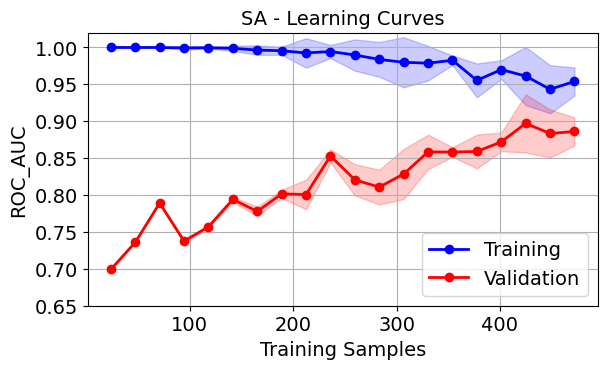

In [73]:
training_samples = np.array(training_size_list) * X_train.shape[0]

fontsize = 14
fig = plt.figure(figsize=(6,3.5))
ax = fig.add_axes([0.13, 0.15, 0.85, 0.78])
ax.plot(training_samples, df_salrncrv_mean_scores['auc_train'], '-o', label='Training', color='b',linewidth=2)
ax.fill_between(training_samples, df_salrncrv_mean_scores['auc_train'] - 2*df_salrncrv_std_scores['auc_train'], 
                                  df_salrncrv_mean_scores['auc_train'] + 2*df_salrncrv_std_scores['auc_train'], alpha=0.2, color="b")

ax.plot(training_samples, df_salrncrv_mean_scores['auc_vld'], '-o', label='Validation', color='r',linewidth=2)
ax.fill_between(training_samples, df_salrncrv_mean_scores['auc_vld'] - 2*df_salrncrv_std_scores['auc_train'], 
                                  df_salrncrv_mean_scores['auc_vld'] + 2*df_salrncrv_std_scores['auc_train'], alpha=0.2, color="r")

ax.set_title('SA - Learning Curves', fontsize=fontsize)
ax.set_xlabel('Training Samples', fontsize=fontsize) 
ax.set_ylabel('ROC_AUC', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.legend(fontsize=fontsize)
ax.set_ylim(0.65,1.02)
ax.set_yticks(np.arange(0.65,1.05,0.05))
plt.grid(True)
fig.savefig('sa_training_sample.png')
plt.show()
plt.close(fig)

In [11]:
# Final training

seed_list = [1, 2, 3, 4, 5]
learning_rate = 0.1
init_temp = 1.0
exp_const = 0.0005
max_iters = 500000
early_stopping = True
max_attempts = 400

parameters = []

output_file = 'sa_final1'

for seed in seed_list:
    parameters.append((init_temp, exp_const, max_iters, learning_rate, early_stopping, max_attempts, seed,
                       X_train_full, y_train_full, X_test, y_test, output_file))

print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', file=open(output_file+'_progress.txt', 'a'))
print('init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts', 'seed', 
      'auc_train', 'auc_vld', 'acc_train', 'acc_vld', 'f1_train', 'f1_vld', 'train_time','fitness',
      file=open(output_file+'_results.txt', 'a'))
                 
if __name__ ==  '__main__':
    p=Pool(processes = 5)
    output = p.map(workers_sa.sa_clbr, parameters)
    print('Done!')

fitcrv=pd.DataFrame()
k = -1
max_len = 0
columns = []
for seed in seed_list:
    k += 1
    if (output[k].shape[0] > max_len): max_len = output[k].shape[0]
    columns.append(f'seed{seed}')
   
fitcrv = pd.DataFrame(np.nan, index=list(range(0,max_len)), columns=columns)
k = -1
for seed in seed_list:
    k += 1
    fitcrv[f'seed{seed}'].values[0:output[k].shape[0]] = output[k][:,0]
fitcrv.ffill(inplace=True)
fitcrv['mean'] = fitcrv.mean(axis=1)
fitcrv['std'] = fitcrv.std(axis=1)
sa_final = fitcrv

Done!


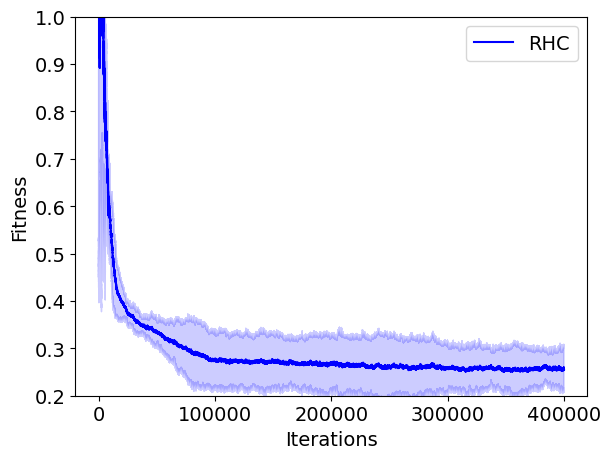

In [12]:
sa_final.to_csv('sa_final1_fitness_curve.csv', index=False) 

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(range(sa_final.shape[0]), sa_final['mean'], label='RHC', color='b')
ax.fill_between(range(sa_final.shape[0]), sa_final['mean'] - 2*sa_final['std'], 
                                          sa_final['mean'] + 2*sa_final['std'], alpha=0.2, color="b")

ax.tick_params(labelsize=fontsize)

#ax.plot(range(len(fitness_curve_rhc6)), fitness_curve_rhc6.mean(axis=1),'b', label='Training max_attempts=100\nlearning_rate=0.001')
#ax.tick_params(labelsize=fontsize)

ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_xlim(0, 8000)
ax.set_ylim(0.2, 1)
ax.legend(fontsize=fontsize)
plt.show()
plt.close(fig)

In [14]:
df_sa_final = pd.read_csv('sa_final1_results.txt', sep=' ')
df_sa_final_mean = df_sa_final.groupby(['init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts']).mean()
df_sa_final_std  = df_sa_final.groupby(['init_temp', 'exp_const', 'max_iters', 'learning_rate', 'early_stopping', 'max_attempts']).std()
df_sa_final_mean

,,,,,,seed,auc_train,auc_vld,acc_train,acc_vld,f1_train,f1_vld,train_time,fitness
init_temp,exp_const,max_iters,learning_rate,early_stopping,max_attempts,,,,,,,,,
1.0,0.0005,400000,0.1,True,400,3.0,0.94389,0.900156,0.871404,0.829134,0.725717,0.631341,908.506318,0.255837


In [74]:
df_sa_final_std

,,,,,,seed,auc_train,auc_vld,acc_train,acc_vld,f1_train,f1_vld,train_time,fitness
init_temp,exp_const,max_iters,learning_rate,early_stopping,max_attempts,,,,,,,,,
1.0,0.0005,400000,0.1,True,400,1.581139,0.012281,0.026531,0.012376,0.019998,0.033368,0.067561,18.333121,0.025058
